## Regression Using Tensorflow

In [26]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

print(tf.__version__)

2.5.0


In [2]:
data = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 4us/step


In [3]:
data

'/root/.keras/datasets/auto-mpg.data'

In [5]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(data, names = cols,
                      na_values = "?", comment = '\t',
                      sep = " ", skipinitialspace = True)

In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
df.dropna(inplace = True)

In [9]:
df = pd.get_dummies(columns = ['Origin'], data = df)

In [12]:
train = df.sample(frac = .8, random_state = 42)
test = df.drop(train.index)

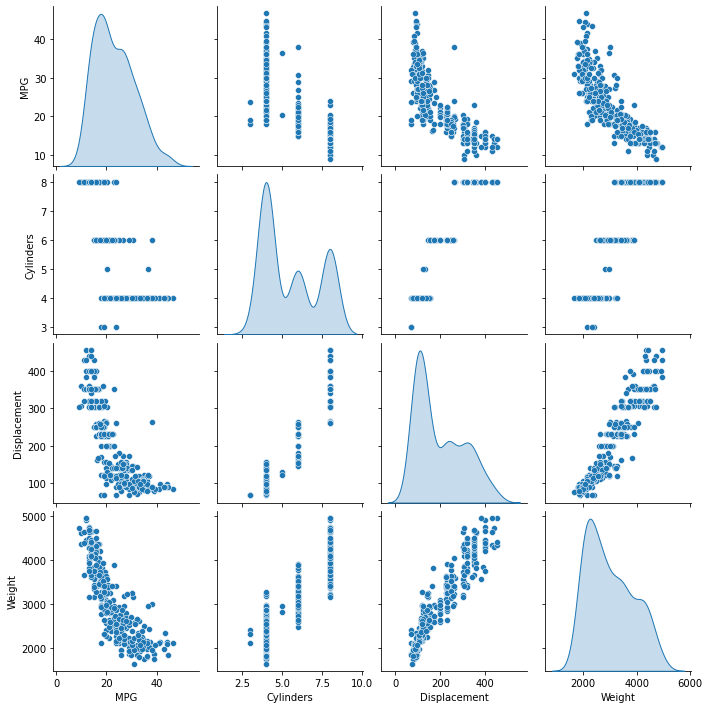

In [14]:
sns.pairplot(train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

In [15]:
y_train = train.pop('MPG')
y_test = test.pop('MPG')

#### 특성(Feature)의 스케일과 범위가 다르기 때문에 정규화를 한다. 정규화 하지 않으면 학습이 어렵고 입력 단위에 의존적인 모델이 만들어진다.

In [22]:
mu = train.mean()
std = train.std()

In [25]:
train = (train - mu) / std
test = (test - mu) / std

In [57]:
def build_model() :
  model = Sequential([
                      Dense(64, activation = 'relu', input_shape = [9]),
                      Dense(32, activation = 'relu'),
                      Dense(1)
  ])

  model.compile(optimizer = 'RMSprop', loss = 'mae', metrics = ['mse'])

  return model

In [58]:
model = build_model()

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(train, y_train, epochs = 1000, validation_split = .2, batch_size = 16, verbose = 0)

In [61]:
mse = history.history['mse']
val_mse = history.history['val_mse']

In [62]:
n_epochs = range(1, 1001)

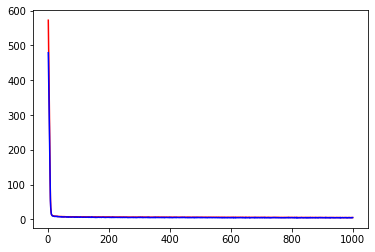

In [63]:
plt.plot(n_epochs, mse, color = 'r', label = 'Train')
plt.plot(n_epochs, val_mse, color = 'b', label = 'Test')

In [64]:
pred = model.predict(test)

In [65]:
from sklearn.metrics import mean_squared_error

In [67]:
rmse = mean_squared_error(y_test, pred) ** .5

In [68]:
print(rmse)

2.4496774629462843
